In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer

In [27]:
# Importing the data file

tennis_Data= pd.read_excel('tennis.xlsx')
tennis_Data

,X,tourney_id,tourney_name,surface,tourney_date,match_date,match_num,round,best_of,gender,...,loser_aces,loser_double_faults,loser_service_points,loser_first_serves_in,loser_first_serves_won,loser_second_serves_won,loser_break_points_saved,loser_break_points_faced,loser_sets,loser_games
0,1,2019-520,Roland Garros,Clay,27/05/2019,27/05/2019,1123,R128,5,male,...,13.0,3.0,147.0,77.0,55.0,33.0,4.0,12.0,2.0,20.0
1,2,2019-520,Roland Garros,Clay,27/05/2019,27/05/2019,1153,R128,5,male,...,5.0,3.0,91.0,49.0,31.0,21.0,8.0,12.0,0.0,9.0
2,3,2019-520,Roland Garros,Clay,27/05/2019,27/05/2019,1118,R128,5,male,...,12.0,11.0,167.0,100.0,62.0,33.0,12.0,18.0,1.0,19.0
3,4,2019-520,Roland Garros,Clay,27/05/2019,27/05/2019,1116,R128,5,male,...,0.0,5.0,177.0,101.0,63.0,43.0,10.0,17.0,2.0,25.0
4,5,2019-520,Roland Garros,Clay,27/05/2019,27/05/2019,1151,R128,5,male,...,7.0,4.0,122.0,75.0,52.0,33.0,7.0,10.0,1.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,4568,2023-560,Us Open,Hard,28/08/2023,02/09/2023,225,SF,5,male,...,5.0,5.0,102.0,72.0,43.0,14.0,9.0,14.0,0.0,11.0
4568,4569,2023-560,Us Open,Hard,28/08/2023,02/09/2023,225,SF,3,female,...,5.0,3.0,110.0,76.0,47.0,16.0,7.0,10.0,1.0,18.0
4569,4570,2023-560,Us Open,Hard,28/08/2023,02/09/2023,224,SF,3,female,...,2.0,2.0,72.0,42.0,22.0,14.0,5.0,10.0,0.0,9.0
4570,4571,2023-560,Us Open,Hard,28/08/2023,03/09/2023,226,F,5,male,...,6.0,6.0,106.0,69.0,49.0,14.0,3.0,6.0,0.0,12.0


In [28]:
# Checking Data types of all columns

tennis_Data.dtypes

X                              int64
tourney_id                    object
tourney_name                  object
surface                       object
tourney_date                  object
match_date                    object
match_num                      int64
round                         object
best_of                        int64
gender                        object
winner_id                      int64
winner_seed                  float64
winner_rank                  float64
winner_name                   object
winner_age                   float64
winner_rating_score          float64
winner_serve_ability         float64
loser_id                       int64
loser_seed                   float64
loser_rank                   float64
loser_name                    object
loser_age                    float64
loser_rating_score           float64
loser_serve_ability          float64
score                         object
minutes                      float64
winner_aces                  float64
w

In [29]:
# Checking if the data has null or missing values

null_Values= tennis_Data.isnull()
null_Values

,X,tourney_id,tourney_name,surface,tourney_date,match_date,match_num,round,best_of,gender,...,loser_aces,loser_double_faults,loser_service_points,loser_first_serves_in,loser_first_serves_won,loser_second_serves_won,loser_break_points_saved,loser_break_points_faced,loser_sets,loser_games
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4568,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4569,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4570,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [30]:
# Converting all the string columns to lowercase so there is no difference while plotting/modelling

tennis_Data['tourney_name'] = tennis_Data['tourney_name'].str.lower()
tennis_Data['surface'] = tennis_Data['surface'].str.lower()
tennis_Data['winner_name'] = tennis_Data['winner_name'].str.lower()
tennis_Data['loser_name'] = tennis_Data['loser_name'].str.lower()
tennis_Data['gender'] = tennis_Data['gender'].str.lower()

tennis_Data

,X,tourney_id,tourney_name,surface,tourney_date,match_date,match_num,round,best_of,gender,...,loser_aces,loser_double_faults,loser_service_points,loser_first_serves_in,loser_first_serves_won,loser_second_serves_won,loser_break_points_saved,loser_break_points_faced,loser_sets,loser_games
0,1,2019-520,roland garros,clay,27/05/2019,27/05/2019,1123,R128,5,male,...,13.0,3.0,147.0,77.0,55.0,33.0,4.0,12.0,2.0,20.0
1,2,2019-520,roland garros,clay,27/05/2019,27/05/2019,1153,R128,5,male,...,5.0,3.0,91.0,49.0,31.0,21.0,8.0,12.0,0.0,9.0
2,3,2019-520,roland garros,clay,27/05/2019,27/05/2019,1118,R128,5,male,...,12.0,11.0,167.0,100.0,62.0,33.0,12.0,18.0,1.0,19.0
3,4,2019-520,roland garros,clay,27/05/2019,27/05/2019,1116,R128,5,male,...,0.0,5.0,177.0,101.0,63.0,43.0,10.0,17.0,2.0,25.0
4,5,2019-520,roland garros,clay,27/05/2019,27/05/2019,1151,R128,5,male,...,7.0,4.0,122.0,75.0,52.0,33.0,7.0,10.0,1.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,4568,2023-560,us open,hard,28/08/2023,02/09/2023,225,SF,5,male,...,5.0,5.0,102.0,72.0,43.0,14.0,9.0,14.0,0.0,11.0
4568,4569,2023-560,us open,hard,28/08/2023,02/09/2023,225,SF,3,female,...,5.0,3.0,110.0,76.0,47.0,16.0,7.0,10.0,1.0,18.0
4569,4570,2023-560,us open,hard,28/08/2023,02/09/2023,224,SF,3,female,...,2.0,2.0,72.0,42.0,22.0,14.0,5.0,10.0,0.0,9.0
4570,4571,2023-560,us open,hard,28/08/2023,03/09/2023,226,F,5,male,...,6.0,6.0,106.0,69.0,49.0,14.0,3.0,6.0,0.0,12.0


# Q1

In [31]:
# Concatinating the columns "Winner_name" and "Loser_name" to find out the count of matches each player has played

players= pd.concat([tennis_Data['winner_name'],tennis_Data['loser_name']])

# Counting the frequency of the times a player name has appeared

match_counts = players.value_counts()

# Finding the players whose names (i.e the number of times they've played a match) counts > 50
match_50= match_counts[match_counts>50]

print(match_50)

novak djokovic        103
iga swiatek            81
daniil medvedev        77
alexander zverev       74
aryna sabalenka        69
rafael nadal           69
stefanos tsitsipas     67
ons jabeur             65
andrey rublev          64
elise mertens          63
matteo berrettini      60
cori gauff             60
jessica pegula         56
diego schwartzman      55
madison keys           55
karen khachanov        55
elina svitolina        54
elena rybakina         54
jannik sinner          54
karolina pliskova      53
karolina muchova       53
casper ruud            51
maria sakkari          51
Name: count, dtype: int64


# 1a

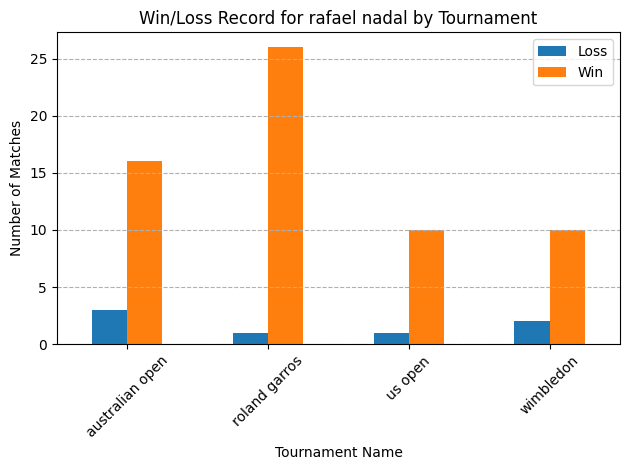

In [32]:
# Choosing Rafael Nadal having played 69 matches

# Making a copy so the original dataset is unchanged
tennis_Data_copy = tennis_Data.copy()

player_name= 'rafael nadal'

# Creating a column 'result' which shows Rafael won or lost in a match and filling it with None values by default
tennis_Data_copy['result']='None'

# Locating the rows in the DataFrame to find his name in the appropriate Win/Lose column and labelling it in the 'result' Column
tennis_Data_copy.loc[tennis_Data_copy['winner_name']==player_name,'result']='Win'
tennis_Data_copy.loc[tennis_Data_copy['loser_name']==player_name,'result']='Loss'

# Filtering out rows where Rafael did not participate (the 'result' value will be None)
tennis_Data_copy = tennis_Data_copy[tennis_Data_copy['result'] != 'None']

# Grouping by 'tourney name' and 'result'
tournament_performance = tennis_Data_copy.groupby(['tourney_name', 'result']).size().unstack(fill_value=0)

# Plotting a graph so its easier to see
tournament_performance.plot(kind='bar')
plt.title(f'Win/Loss Record for {player_name} by Tournament')
plt.xlabel('Tournament Name')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

# 1b

In [33]:
# Counting values for each 'Surface' in the dataset
players_surf= tennis_Data['surface'].value_counts()
players_surf

surface
hard     2286
clay     1270
grass    1016
Name: count, dtype: int64

<Figure size 1200x600 with 0 Axes>

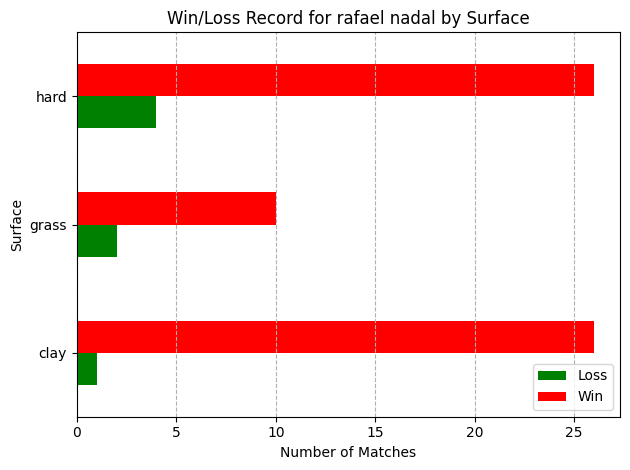

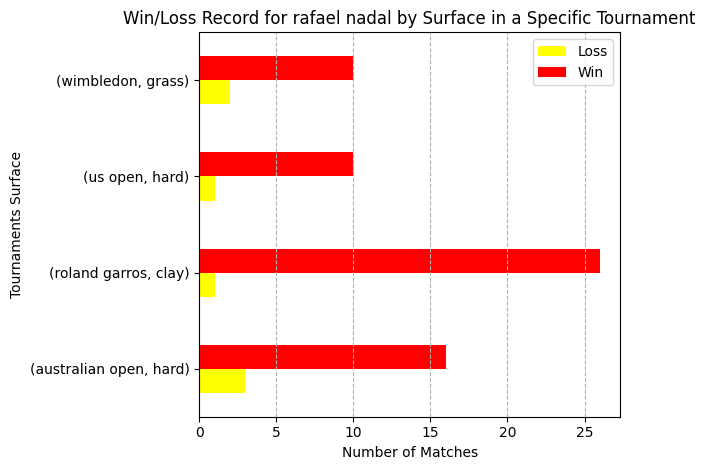

In [34]:
# Grouping by 'Tournament name' 'Surface' and 'result'
surface_performance_Tournament = tennis_Data_copy.groupby(['tourney_name','surface', 'result']).size().unstack(fill_value=0)

surface_performance = tennis_Data_copy.groupby(['surface', 'result']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))

# Plotting a graph to see the Win/loss record of Rafael based on the 'Surface'
surface_performance.plot(kind='barh',color={'green','red'})
plt.title(f'Win/Loss Record for {player_name} by Surface')
plt.ylabel('Surface')
plt.xlabel('Number of Matches')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.legend()
plt.show()

# Plotting a graph to see the Win/loss record of Rafael based on the 'Surface' in a Specific Tournament
surface_performance_Tournament.plot(kind='barh',color={'yellow','red'})
plt.title(f'Win/Loss Record for {player_name} by Surface in a Specific Tournament')
plt.ylabel('Tournaments Surface')
plt.xlabel('Number of Matches')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.legend()
plt.show()

# 1c

In [35]:
# Making a copy of the original dataset in order to prevent changes in the original data
tennis_Data_copy1= tennis_Data.copy()
tennis_Data_copy1

,X,tourney_id,tourney_name,surface,tourney_date,match_date,match_num,round,best_of,gender,...,loser_aces,loser_double_faults,loser_service_points,loser_first_serves_in,loser_first_serves_won,loser_second_serves_won,loser_break_points_saved,loser_break_points_faced,loser_sets,loser_games
0,1,2019-520,roland garros,clay,27/05/2019,27/05/2019,1123,R128,5,male,...,13.0,3.0,147.0,77.0,55.0,33.0,4.0,12.0,2.0,20.0
1,2,2019-520,roland garros,clay,27/05/2019,27/05/2019,1153,R128,5,male,...,5.0,3.0,91.0,49.0,31.0,21.0,8.0,12.0,0.0,9.0
2,3,2019-520,roland garros,clay,27/05/2019,27/05/2019,1118,R128,5,male,...,12.0,11.0,167.0,100.0,62.0,33.0,12.0,18.0,1.0,19.0
3,4,2019-520,roland garros,clay,27/05/2019,27/05/2019,1116,R128,5,male,...,0.0,5.0,177.0,101.0,63.0,43.0,10.0,17.0,2.0,25.0
4,5,2019-520,roland garros,clay,27/05/2019,27/05/2019,1151,R128,5,male,...,7.0,4.0,122.0,75.0,52.0,33.0,7.0,10.0,1.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,4568,2023-560,us open,hard,28/08/2023,02/09/2023,225,SF,5,male,...,5.0,5.0,102.0,72.0,43.0,14.0,9.0,14.0,0.0,11.0
4568,4569,2023-560,us open,hard,28/08/2023,02/09/2023,225,SF,3,female,...,5.0,3.0,110.0,76.0,47.0,16.0,7.0,10.0,1.0,18.0
4569,4570,2023-560,us open,hard,28/08/2023,02/09/2023,224,SF,3,female,...,2.0,2.0,72.0,42.0,22.0,14.0,5.0,10.0,0.0,9.0
4570,4571,2023-560,us open,hard,28/08/2023,03/09/2023,226,F,5,male,...,6.0,6.0,106.0,69.0,49.0,14.0,3.0,6.0,0.0,12.0


In [36]:
# https://www.sciencedirect.com/science/article/abs/pii/S0031938422000919#:~:text=Tennis%20players%20are%20put%20under,point%20opportunity%20%5B6%5D%2C%20important

# The below article above the tennis players are underpressure when they're facing break points so based on this:

# 1. I have first determined the criteria for high pressure situations i.e
#     i. if there is a tie-break (based on the 'score' column). Example if the score in a set was '7-6' or '6-7'
#     ii. Based on the 'score', see if the match went to the total amount of sets defined in 'best of' column.
#         Example for best of 3 matches, the third set is the deciding set.
#     iii. If the player is playing with a higher-ranked opponent

# 2. Based on the high-pressure situations for each player, calculating a ratio based on checking the break point faced and saved.

# player_id for Rafael Nadal = 104745
player_id = 104745

# Function to determine if a tie-break occurred

def has_tie_break(score):
    # Splitting the score into individual sets and checking for tie-breaks

    for set_score in score.split():
        if set_score.startswith('7-6') or set_score.startswith('6-7'):
            return True
    return False

# Function to determine if it's a deciding set

def is_deciding_set(score, best_of):
    sets = score.split()

    # Comparing the len of sets in 'score' with the 'best_of'
    return (best_of == 3 and len(sets) == 3) or (best_of == 5 and len(sets) == 5)

# Function to determine if the opponent was higher ranked

def faced_higher_ranked_opponent(winner_rank, loser_rank):
    return winner_rank > loser_rank

# Creating new columns in the dataFrame based on the above functions
tennis_Data_copy1['tie_break'] = tennis_Data_copy1['score'].apply(has_tie_break)

tennis_Data_copy1['deciding_set'] = tennis_Data_copy1.apply(lambda x: is_deciding_set(x['score'], x['best_of']), axis=1)

tennis_Data_copy1['faced_higher_ranked'] = tennis_Data_copy1.apply(lambda x: faced_higher_ranked_opponent(x['winner_rank'], x['loser_rank']), axis=1)

player_matches=tennis_Data_copy1.copy()

# Finding the matches played by Rafael where the break points faced and saved are greater than 0 so we don't get an error while finding a ratio later
player_matches = player_matches[((player_matches['winner_id'] == player_id) & (player_matches['winner_break_points_faced'] > 0)) |
    ((player_matches['loser_id'] == player_id) & (player_matches['loser_break_points_faced'] > 0))
]

# Filtering Rafael's match data based on high pressure situations defined above
high_pressure_matches = player_matches[player_matches['tie_break'] | player_matches['deciding_set'] | player_matches['faced_higher_ranked']]

# For each match, either won or lost, calculating the break_point saved ratio by dividing the break_point_saved/break_point_faced
high_pressure_matches['break_points_saved_ratio'] = high_pressure_matches.apply(lambda row: (row['winner_break_points_saved'] / row['winner_break_points_faced'])
    if row['winner_id'] == player_id else (row['loser_break_points_saved'] / row['loser_break_points_faced']), axis=1)

# Calculating the average of ratios for Rafael in high-pressure situations
average_bps_ratio_under_pressure = high_pressure_matches['break_points_saved_ratio'].mean()
print(f"Average Break Points Saved Ratio for Player ID {player_id} in High Pressure Situations: {average_bps_ratio_under_pressure:.2f}")

# The value of ratio for Rafael was 0.57 which suggests that the he saves break points almost half the time indicating to an average performancein high performance situations

Average Break Points Saved Ratio for Player ID 104745 in High Pressure Situations: 0.57


<ipython-input-36-5e15763c8dc0>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_pressure_matches['break_points_saved_ratio'] = high_pressure_matches.apply(lambda row: (row['winner_break_points_saved'] / row['winner_break_points_faced'])


# Q2

In [37]:
tennis_Data_copy1= tennis_Data.copy()

# Setting the criteria of finding best serves based on the winner's aces and maintaining the first_Serves
tennis_Data_copy1['best_serve'] = tennis_Data_copy1['winner_aces'] + (tennis_Data_copy1['winner_first_serves_won'] / tennis_Data_copy1['winner_first_serves_in'])

# Separating male and female's data
men_data = tennis_Data_copy1[tennis_Data_copy1['gender'] == 'male']
women_data = tennis_Data_copy1[tennis_Data_copy1['gender'] == 'female']

# Finding the player with the best serving ability based on the above criteria in male games
best_male_server = men_data.loc[men_data['best_serve'].idxmax()]

# Finding the player with the best serving ability based on the above criteria in female games
best_female_server = women_data.loc[women_data['best_serve'].idxmax()]

# Printing the details of the best male server
print("Best male server:")
print(best_male_server[['winner_name', 'best_serve', 'winner_aces', 'winner_first_serves_in', 'winner_first_serves_won']])

# Printing the details of the best female server
print("\nBest female server:")
print(best_female_server[['winner_name', 'best_serve', 'winner_aces', 'winner_first_serves_in', 'winner_first_serves_won']])


Best male server:
winner_name                john isner
best_serve                  54.843478
winner_aces                      54.0
winner_first_serves_in          115.0
winner_first_serves_won          97.0
Name: 3082, dtype: object

Best female server:
winner_name                karolina pliskova
best_serve                            24.775
winner_aces                             24.0
winner_first_serves_in                  80.0
winner_first_serves_won                 62.0
Name: 2466, dtype: object


# 2b

In [38]:
# Finding top 10 male servers
top_10_male_servers = men_data.groupby('winner_name')['best_serve'].mean().nlargest(10)

# Finding top 10 female servers
top_10_female_servers = women_data.groupby('winner_name')['best_serve'].mean().nlargest(10)
tennis_Data_copy1

,X,tourney_id,tourney_name,surface,tourney_date,match_date,match_num,round,best_of,gender,...,loser_double_faults,loser_service_points,loser_first_serves_in,loser_first_serves_won,loser_second_serves_won,loser_break_points_saved,loser_break_points_faced,loser_sets,loser_games,best_serve
0,1,2019-520,roland garros,clay,27/05/2019,27/05/2019,1123,R128,5,male,...,3.0,147.0,77.0,55.0,33.0,4.0,12.0,2.0,20.0,5.685714
1,2,2019-520,roland garros,clay,27/05/2019,27/05/2019,1153,R128,5,male,...,3.0,91.0,49.0,31.0,21.0,8.0,12.0,0.0,9.0,3.850000
2,3,2019-520,roland garros,clay,27/05/2019,27/05/2019,1118,R128,5,male,...,11.0,167.0,100.0,62.0,33.0,12.0,18.0,1.0,19.0,30.818182
3,4,2019-520,roland garros,clay,27/05/2019,27/05/2019,1116,R128,5,male,...,5.0,177.0,101.0,63.0,43.0,10.0,17.0,2.0,25.0,17.735043
4,5,2019-520,roland garros,clay,27/05/2019,27/05/2019,1151,R128,5,male,...,4.0,122.0,75.0,52.0,33.0,7.0,10.0,1.0,18.0,12.819277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,4568,2023-560,us open,hard,28/08/2023,02/09/2023,225,SF,5,male,...,5.0,102.0,72.0,43.0,14.0,9.0,14.0,0.0,11.0,5.835821
4568,4569,2023-560,us open,hard,28/08/2023,02/09/2023,225,SF,3,female,...,3.0,110.0,76.0,47.0,16.0,7.0,10.0,1.0,18.0,12.640625
4569,4570,2023-560,us open,hard,28/08/2023,02/09/2023,224,SF,3,female,...,2.0,72.0,42.0,22.0,14.0,5.0,10.0,0.0,9.0,1.606061
4570,4571,2023-560,us open,hard,28/08/2023,03/09/2023,226,F,5,male,...,6.0,106.0,69.0,49.0,14.0,3.0,6.0,0.0,12.0,4.813559


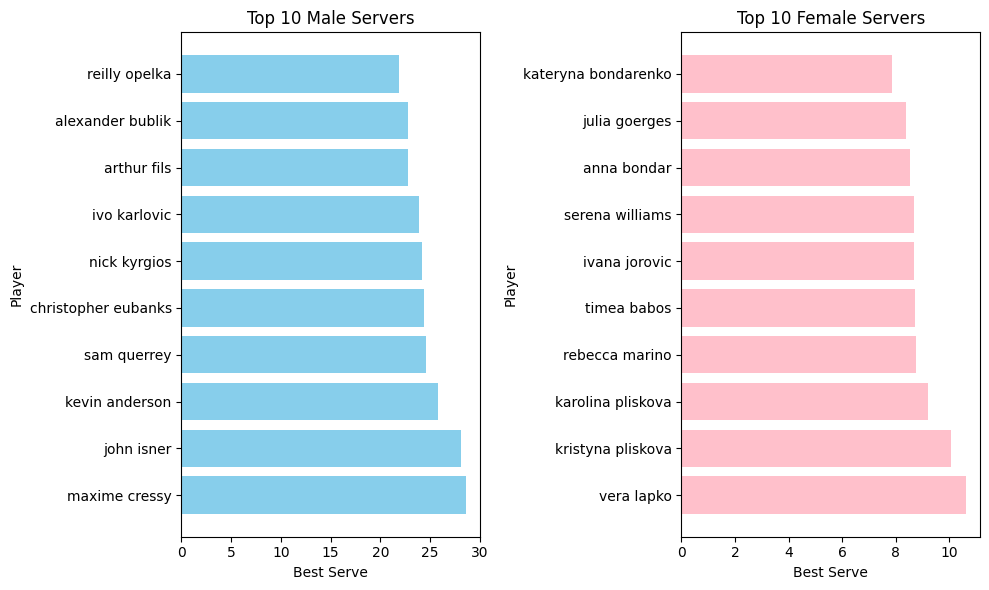

In [39]:
# Plotting the top 10 servers for each gender

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.barh(top_10_male_servers.index, top_10_male_servers.values, color='skyblue')
plt.title('Top 10 Male Servers')
plt.xlabel('Best Serve')
plt.ylabel('Player')

plt.subplot(1, 2, 2)
plt.barh(top_10_female_servers.index, top_10_female_servers.values, color='pink')
plt.title('Top 10 Female Servers')
plt.xlabel('Best Serve')
plt.ylabel('Player')

plt.tight_layout()
plt.show()

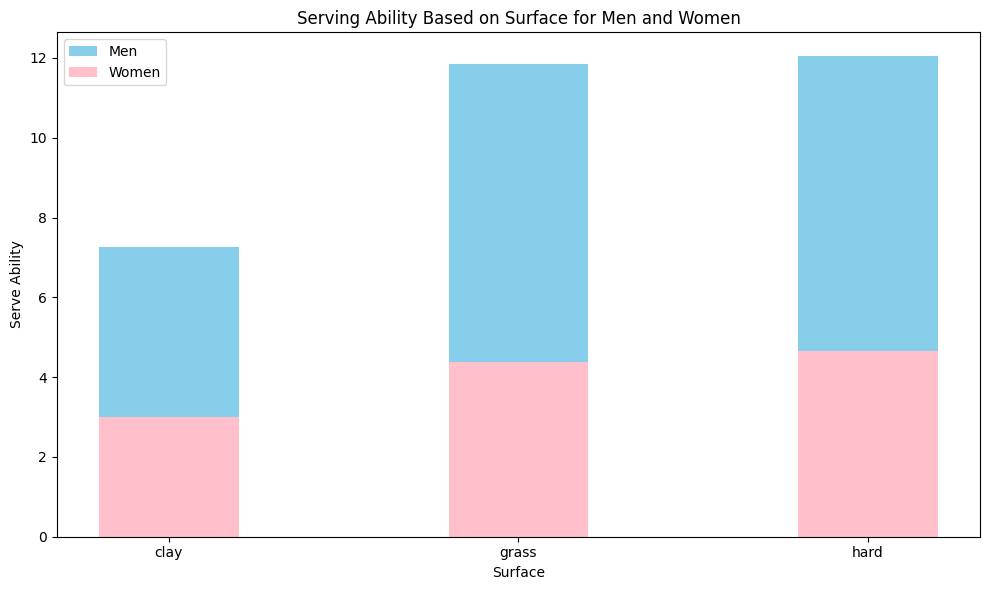

In [40]:
# Grouping the data for each genders' best serve based on the surface to see if there is a performance difference in the genders due to the surface

men_surface_mean = men_data.groupby('surface')['best_serve'].mean()
women_surface_mean = women_data.groupby('surface')['best_serve'].mean()

plt.figure(figsize=(10, 6))
plt.bar(men_surface_mean.index, men_surface_mean.values, width=0.4, align='center', label='Men', color='skyblue')
plt.bar(women_surface_mean.index, women_surface_mean.values, width=0.4, align='center', label='Women', color='pink')

plt.title('Serving Ability Based on Surface for Men and Women')
plt.xlabel('Surface')
plt.ylabel('Serve Ability')
plt.legend()
plt.tight_layout()
plt.show()

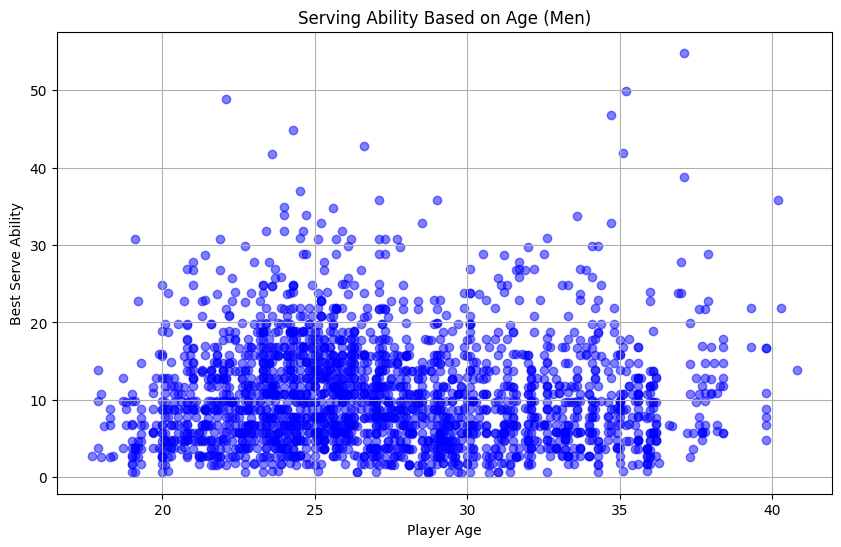

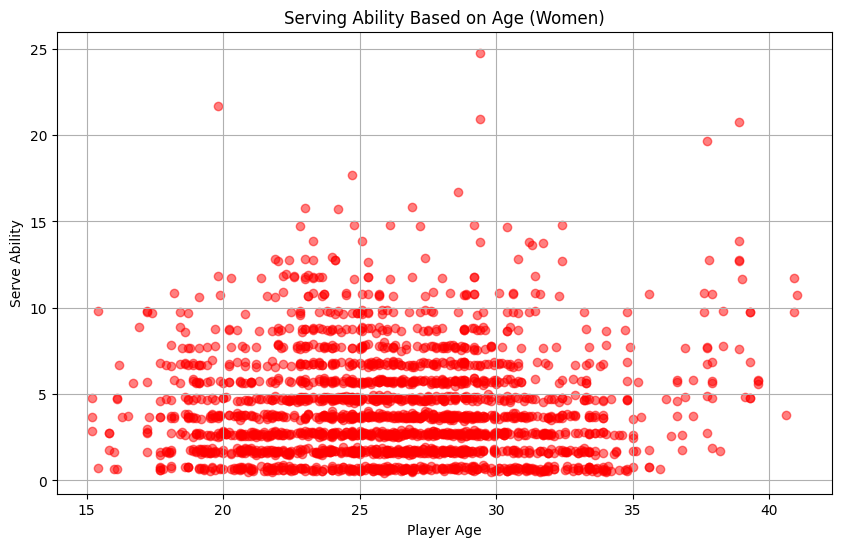

In [41]:
# Plotting best serving ability with age to see if the performance in each gender varies by age

plt.figure(figsize=(10, 6))
plt.scatter(men_data['winner_age'], men_data['best_serve'], color='blue', alpha=0.5)
plt.title('Serving Ability Based on Age (Men)')
plt.xlabel('Player Age')
plt.ylabel('Best Serve Ability')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(women_data['winner_age'], women_data['best_serve'], color='red', alpha=0.5)
plt.title('Serving Ability Based on Age (Women)')
plt.xlabel('Player Age')
plt.ylabel('Serve Ability')
plt.grid(True)
plt.show()


# Q3

In [42]:
tennis_Data_copy=tennis_Data.copy()

# One-hot encoding the below categorical columns in order to find the coorelation
categorical_vars = ['tourney_name', 'surface', 'round']
tennis_Data_copy = pd.get_dummies(tennis_Data_copy, columns=categorical_vars,dtype=int)
tennis_Data_copy

,X,tourney_id,tourney_date,match_date,match_num,best_of,gender,winner_id,winner_seed,winner_rank,...,surface_clay,surface_grass,surface_hard,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_SF
0,1,2019-520,27/05/2019,27/05/2019,1123,5,male,105173,NaN,48.0,...,1,0,0,0,0,1,0,0,0,0
1,2,2019-520,27/05/2019,27/05/2019,1153,5,male,200282,21.0,25.0,...,1,0,0,0,0,1,0,0,0,0
2,3,2019-520,27/05/2019,27/05/2019,1118,5,male,122330,NaN,91.0,...,1,0,0,0,0,1,0,0,0,0
3,4,2019-520,27/05/2019,27/05/2019,1116,5,male,100644,5.0,5.0,...,1,0,0,0,0,1,0,0,0,0
4,5,2019-520,27/05/2019,27/05/2019,1151,5,male,200615,NaN,109.0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,4568,2023-560,28/08/2023,02/09/2023,225,5,male,104925,2.0,2.0,...,0,0,1,0,0,0,0,0,0,1
4568,4569,2023-560,28/08/2023,02/09/2023,225,3,female,214544,2.0,2.0,...,0,0,1,0,0,0,0,0,0,1
4569,4570,2023-560,28/08/2023,02/09/2023,224,3,female,221103,6.0,6.0,...,0,0,1,0,0,0,0,0,0,1
4570,4571,2023-560,28/08/2023,03/09/2023,226,5,male,104925,2.0,2.0,...,0,0,1,1,0,0,0,0,0,0


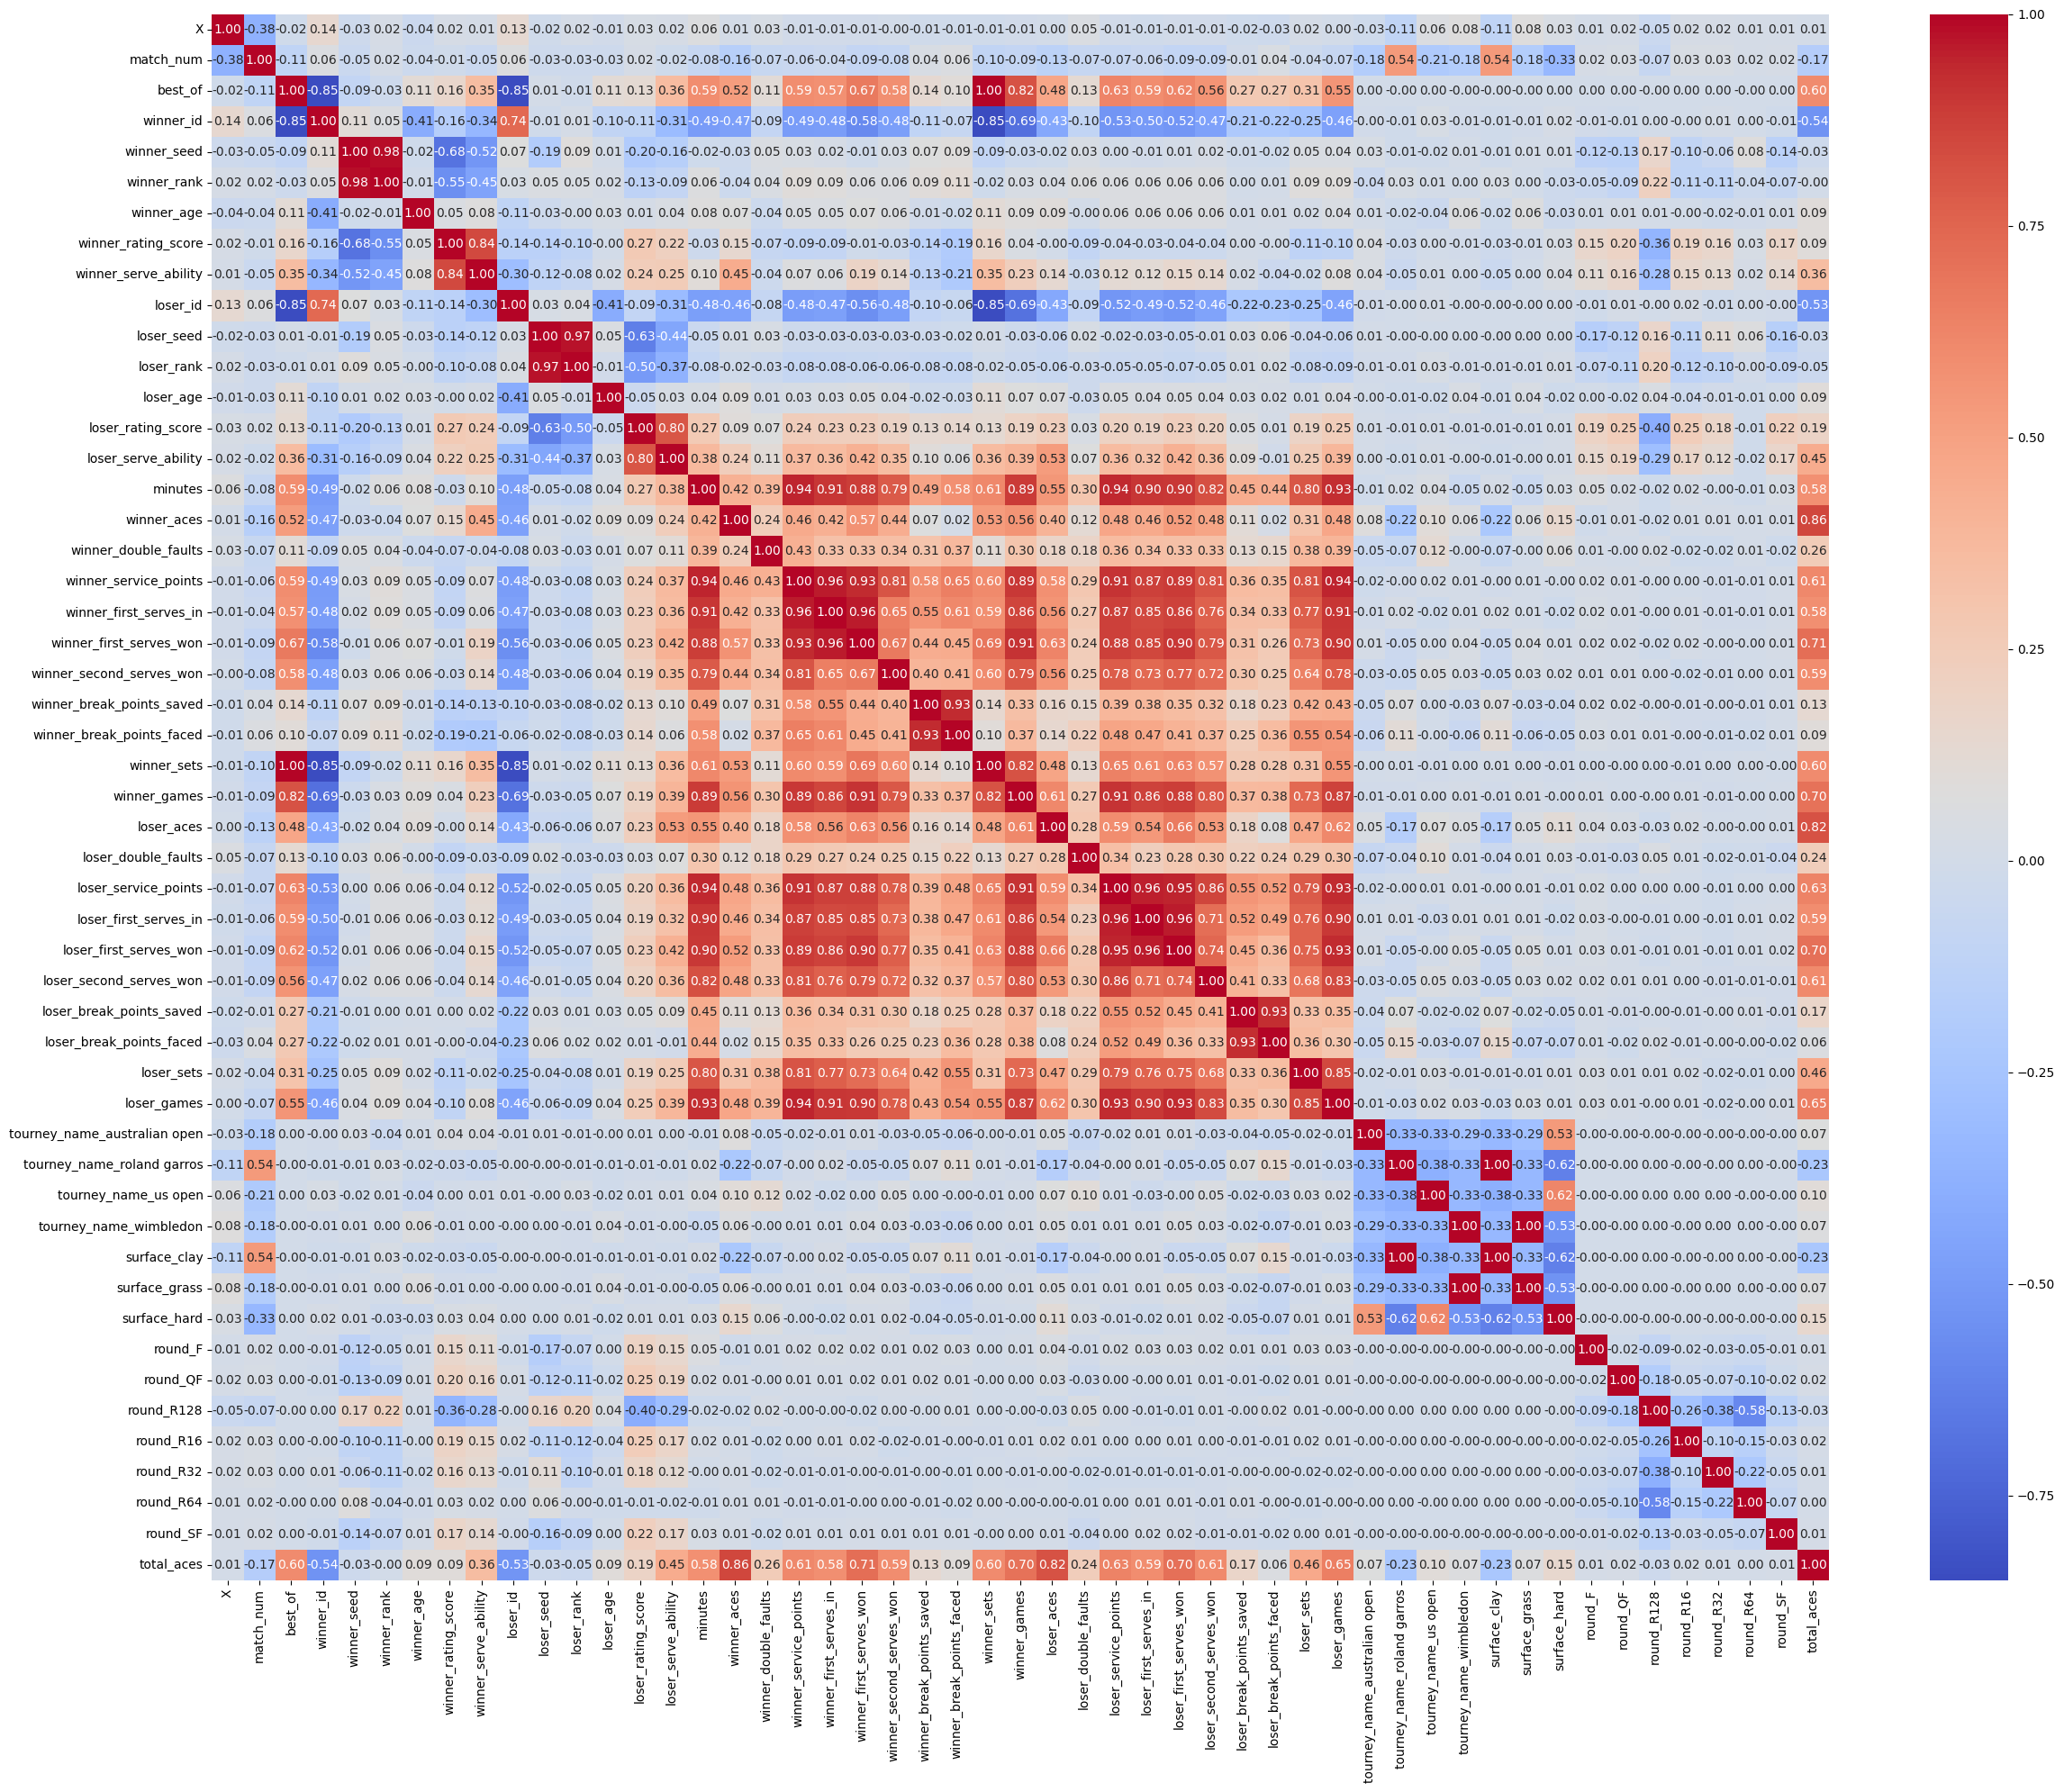

In [43]:
# Calculating the total number of aces in a match by summing up the winner and loser's aces. Storing it in a new column 'Total_aces'
tennis_Data_copy['total_aces'] = tennis_Data_copy['winner_aces'] + tennis_Data_copy['loser_aces']

# Only considering the numeric columns from the dataFrame in order to calculate the coorelation
numeric_df = tennis_Data_copy.select_dtypes(include=['float64', 'int64'])

# Computing the correlation matrix and plotting it in a heatmap for better visualisation
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(25,20))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.tight_layout()
plt.show()

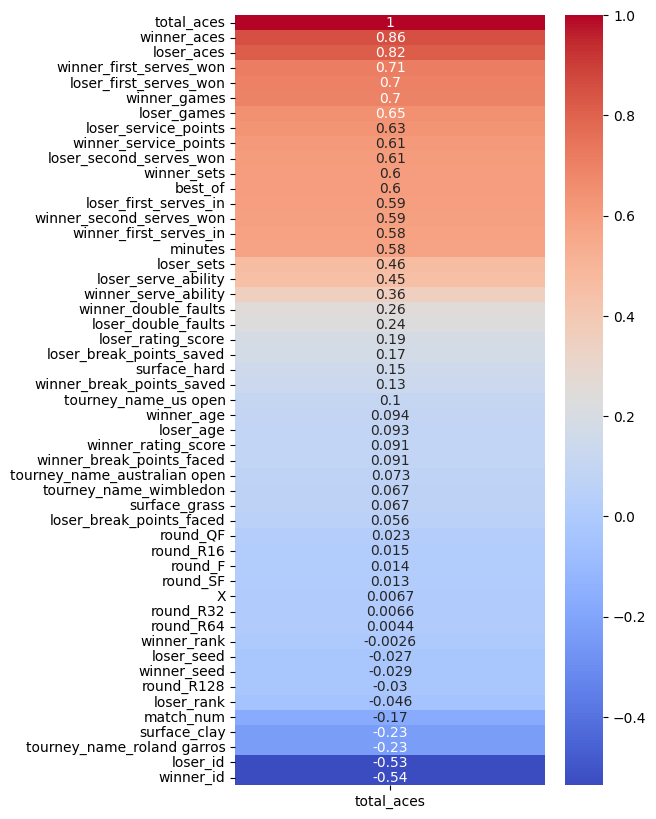

In [44]:
# Setting 'total_aces' as the target column for my model and focusing on its correlations with all the other columns
# in order to select only the columns which are highly coorelated.
plt.figure(figsize=(5, 10))
sns.heatmap(correlation_matrix[['total_aces']].sort_values(by='total_aces', ascending=False), annot=True, cmap='coolwarm')
plt.show()

In [45]:
# Selecting columns with a correlation greater than 0.5 (positive coorelation) with 'total_aces'
high_corr_features = correlation_matrix.index[(correlation_matrix['total_aces']) > 0.5].tolist()

# Since the data had many null values, they were handled by imputing values using KNN which works by calculating the values of that column
# based on the closet similar neighbour's values for that column
imputer = KNNImputer(n_neighbors=5)
tennis_highly_correlated_features=tennis_Data_copy[high_corr_features]
tennis_highly_correlated_features = pd.DataFrame(imputer.fit_transform(tennis_highly_correlated_features), columns=tennis_highly_correlated_features.columns)

tennis_highly_correlated_features

,best_of,minutes,winner_aces,winner_service_points,winner_first_serves_in,winner_first_serves_won,winner_second_serves_won,winner_sets,winner_games,loser_aces,loser_service_points,loser_first_serves_in,loser_first_serves_won,loser_second_serves_won,loser_games,total_aces
0,5.0,224.0,5.0,170.0,105.0,72.0,33.0,3.0,27.0,13.0,147.0,77.0,55.0,33.0,20.0,18.0
1,5.0,102.0,3.0,72.0,40.0,34.0,23.0,3.0,18.0,5.0,91.0,49.0,31.0,21.0,9.0,8.0
2,5.0,154.0,30.0,133.0,77.0,63.0,31.0,3.0,26.0,12.0,167.0,100.0,62.0,33.0,19.0,42.0
3,5.0,248.0,17.0,165.0,117.0,86.0,18.0,3.0,27.0,0.0,177.0,101.0,63.0,43.0,25.0,17.0
4,5.0,172.0,12.0,132.0,83.0,68.0,23.0,3.0,22.0,7.0,122.0,75.0,52.0,33.0,18.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,5.0,161.0,5.0,99.0,67.0,56.0,11.0,3.0,19.0,5.0,102.0,72.0,43.0,14.0,11.0,10.0
4568,3.0,152.0,12.0,98.0,64.0,41.0,19.0,2.0,14.0,5.0,110.0,76.0,47.0,16.0,18.0,17.0
4569,3.0,123.0,1.0,60.0,33.0,20.0,18.0,2.0,13.0,2.0,72.0,42.0,22.0,14.0,9.0,3.0
4570,5.0,197.0,4.0,109.0,59.0,48.0,27.0,3.0,19.0,6.0,106.0,69.0,49.0,14.0,12.0,10.0


In [46]:
# Divding the data into feature and target columns
X =  tennis_highly_correlated_features.iloc[:, :-1]
y = tennis_highly_correlated_features['total_aces']
y

0       18.0
1        8.0
2       42.0
3       17.0
4       19.0
        ... 
4567    10.0
4568    17.0
4569     3.0
4570    10.0
4571     6.0
Name: total_aces, Length: 4572, dtype: float64

In [47]:
print(X.shape)
print(y.shape)

(4572, 15)
(4572,)


In [48]:
# Splitting the X (feature columns) and y (target) based on a ratio of 70:30 into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Applying multiple regression model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
# Predicitng the model for values on test set
predictions = model.predict(X_test)

# Evaluating the model's prediction with actual target values in the test data
print(f"Mean Squared Error (MSE): ", mean_squared_error(y_test, predictions))
print(f"Mean Absolute Error (MAE): ", mean_absolute_error(y_test, predictions))

Mean Squared Error (MSE):  2.1164297010999855e-27
Mean Absolute Error (MAE):  3.682678712872821e-14
